#

# Programming Exercise 1

## Objective

- The network should have 64 input nodes
- The second layer has 30 nodes
- The output layer should have 10 output nodes
- Train the model with this dataset: Optical Recognition of Handwritten Digits
- Select appropriate optimizer and loss functions
- Plot training loss and accuracy per epoch

### 1. Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2025-09-04 15:09:57.679262: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-04 15:09:57.745874: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 15:09:59.882603: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


### 2. Load Data Set

- There is 1797 datasets with each image being 64 pixels
- Since each image has 64 pixels with varying brightness, we scale its brightness by 0 to 16. With 0 being dark and 16 being brightess that scales from 0 to 1
- y_cat is a one-hot encoder label that categorizes the correct dataset into a numerical value to help in training later on.
- The train/ test is split to 80/20 with a random state of 42

In [ ]:
digits = load_digits()

X = digits.data   # shape (1797, 64)
y = digits.target

# Normalize data (0–1 scale)
X = X / 16.0

# One-hot encode labels
y_cat = to_categorical(y, 10)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

### 3. Build Model

- 64 inputs > 30 hidden layer > 10 output
- ReLU (hidden layer), it keeps the values greater than 0 and dismiss inputs that are less than 0
- Softmax (output), it takes values from hidden layer and exponentiate  and divide by total to add up to 1. It then takes the largest probability and chooses that as the correct answer 

In [ ]:
model = Sequential([
    Dense(30, input_dim=64, activation='relu'),
    Dense(10, activation='softmax')
])

/home/pj/Documents/Academics/LBYCPC4/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-04 15:10:00.189943: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### 4. Compile Model

- Adam, everytime the output is incorrect. It makes small adjustment to the model's value hoping in the next run the output would be better
- categorical_crossentropy, it compares the model's accuracy to the correct answer and measures how much loss is there
- accuracy, it counts how many times the model outputs correctly 

In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 5. Train Model

- function `fit` is training session
- 50 epochs, number of loops
- 32 information input per loop
- `verbose` shows the progress

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1614 - loss: 2.2695 - val_accuracy: 0.2611 - val_loss: 2.1335
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4168 - loss: 1.9534 - val_accuracy: 0.5222 - val_loss: 1.7954
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6541 - loss: 1.5861 - val_accuracy: 0.7583 - val_loss: 1.4142
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7975 - loss: 1.2462 - val_accuracy: 0.8778 - val_loss: 1.0945
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.9777 - val_accuracy: 0.8778 - val_loss: 0.8565
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8817 - loss: 0.7729 - val_accuracy: 0.9056 - val_loss: 0.6781
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9068 - loss: 0.6229 - val_accuracy: 0.9111 - val_loss: 0.5493
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9151 - loss: 0.5264 - val_accuracy: 0.9139 - val_loss

### 6. Plot Train & Loss Accuracy

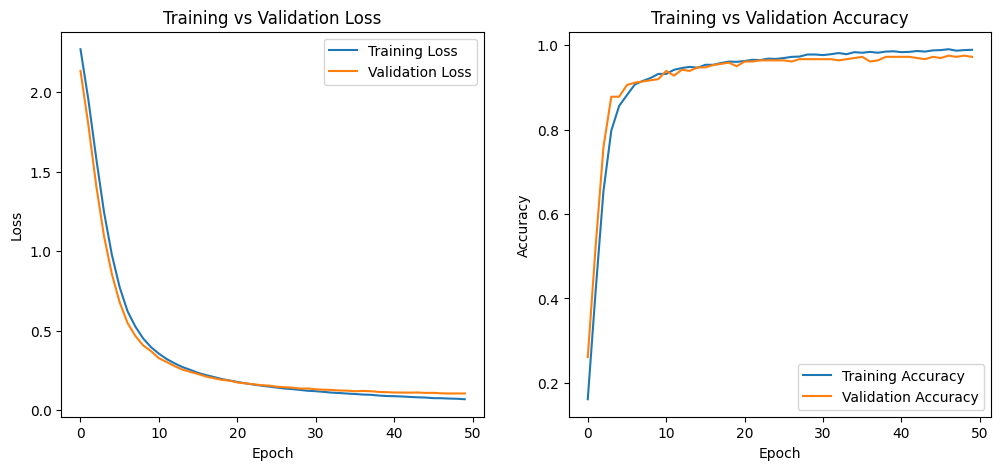

In [6]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.show()


## 7. Model Accuracy


In [8]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"The model accuracy is: {accuracy * 100:.2f}%")

The model accuracy is: 97.22%
